In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(1,6)
y = np.array([1.,3.,2.,3.,5.])

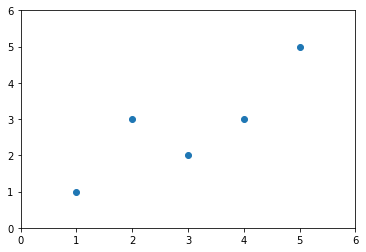

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

In [4]:
x_mean = x.mean()
y_mean = y.mean()
a = np.sum([(i - x_mean) * (j - y_mean) for i, j in zip(x, y)]) / np.sum([(i - x_mean)**2 for i in x])
b = y_mean - a * x_mean

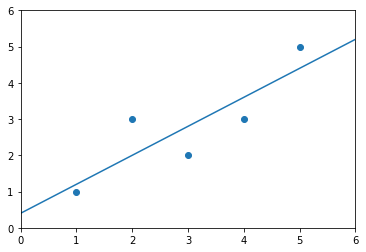

In [5]:
plt.scatter(x, y)
x0 = np.linspace(0,6,10)
y0 = a*x0+b
plt.plot(x0,y0)
plt.axis([0, 6, 0, 6]) 
plt.show()

In [6]:
import numpy as np


class SimpleLinearRegression2:
    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        assert x_train.ndim == 1 and y_train.ndim == 1
        assert len(x_train) == len(y_train)
        x_mean = x_train.mean()
        y_mean = y_train.mean()
        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / ((x_train - x_mean) ** 2).sum()
        self.b_ = y_mean - self.a_ * x_mean

    def predict(self, x: int or float or np.ndarray) -> np.ndarray:
        assert self.a_ is not None and self.b_ is not None
        if isinstance(x, int) or isinstance(x, float):
            return np.array([self.a_ * x + self.b_])
        else:
            assert x.ndim == 1
            return self.a_ * x + self.b_


In [7]:
s = SimpleLinearRegression2()

In [8]:
import numpy as np


class SimpleLinearRegression3:
    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        assert x_train.ndim == 1 and y_train.ndim == 1
        assert len(x_train) == len(y_train)
        x_mean = x_train.mean()
        y_mean = y_train.mean()
        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

    def predict(self, x: int or float or np.ndarray) -> np.ndarray:
        assert self.a_ is not None and self.b_ is not None
        if isinstance(x, int) or isinstance(x, float):
            return np.array([self.a_ * x + self.b_])
        else:
            assert x.ndim == 1
            return self.a_ * x + self.b_

In [9]:
s.fit(x, y)

In [10]:
yl = s.predict(x)

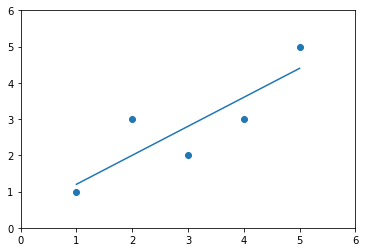

In [11]:
plt.scatter(x, y)
plt.plot(x,yl)
plt.axis([0, 6, 0, 6]) 
plt.show()

In [12]:
s.a_

0.8

In [13]:
s.b_

0.39999999999999947

In [14]:
y.mean()

2.8

In [15]:
class SimpleLinearRegression1:
    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        assert x_train.ndim == 1 and y_train.ndim == 1
        assert len(x_train) == len(y_train)
        x_mean = x_train.mean()
        y_mean = y_train.mean()
        self.a_ = np.sum([(i - x_mean) * (j - y_mean) for i, j in zip(x_train, y_train)]) / np.sum(
            [(i - x_mean) ** 2 for i in x_train])
        self.b_ = y_mean - self.a_ * x_mean

    def predict(self, x: int or float or np.ndarray) -> np.ndarray:
        assert self.a_ is not None and self.b_ is not None
        if isinstance(x, int) or isinstance(x, float):
            return np.array([self.a_ * x + self.b_])
        else:
            assert x.ndim == 1
            return self.a_ * x + self.b_

In [16]:
s0 = SimpleLinearRegression1()

In [17]:
s0.fit(x,y)

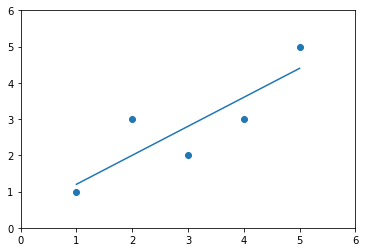

In [18]:
plt.scatter(x, y)
plt.plot(x,s0.predict(x))
plt.axis([0, 6, 0, 6]) 
plt.show()

In [19]:
s0.predict(x)

array([1.2, 2. , 2.8, 3.6, 4.4])

In [20]:
s.a_

0.8

In [21]:
s0.a_

0.8

In [22]:
(x - x.mean()).dot(y - y.mean())

8.0

In [23]:
((x - x.mean()) ** 2).sum()

10.0

In [24]:
8.0/10.0

0.8

In [25]:
x = np.linspace(0,10000,10000)

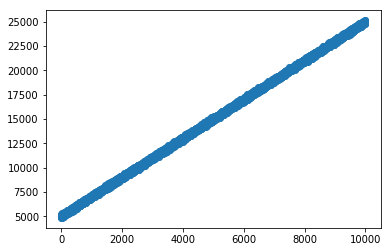

In [26]:
y = x * 2 + 5000
for i in range(len(x)):
    y[i] += np.random.randn()*100

plt.scatter(x,y)

32.9 ms ± 795 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


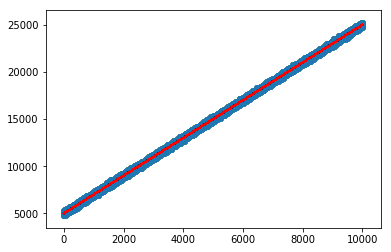

In [27]:
%%timeit
s = SimpleLinearRegression1()
s.fit(x,y)
plt.scatter(x,y)
plt.plot(x, s.predict(x), color = "r")

24.5 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


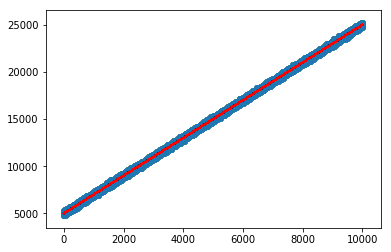

In [28]:
%%timeit
s = SimpleLinearRegression2()
s.fit(x,y)
plt.scatter(x,y)
plt.plot(x, s.predict(x), color = "r")

24.5 ms ± 492 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


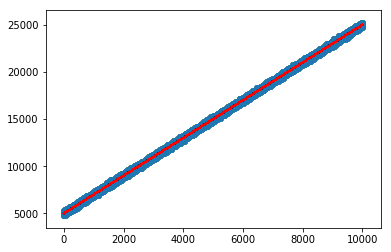

In [29]:
%%timeit
s = SimpleLinearRegression3()
s.fit(x,y)
plt.scatter(x,y)
plt.plot(x, s.predict(x), color = "r")

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [34]:
s = SimpleLinearRegression3()
s.fit(x_train, y_train)
y_predict = s.predict(x_test)
res = (y_test - y_predict).dot(y_test - y_predict)

In [36]:
res/len(y_predict)

9620.721626149849

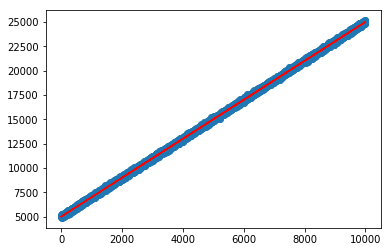

In [38]:
plt.scatter(x_train, y_train)
plt.plot(x_test, y_predict, color = "r")
plt.show()

In [39]:
np.sqrt(res /len(y_predict))

98.08527731596546

In [41]:
from sklearn import datasets

In [42]:
boston = datasets.load_boston()

In [44]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [49]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [50]:
x = boston.data[:, 5]

In [51]:
y = boston.target

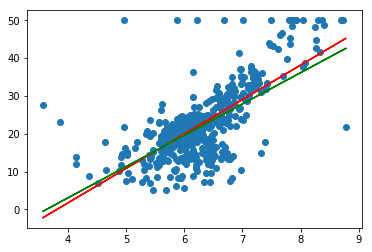

In [60]:
s1 = SimpleLinearRegression3()
s2 = SimpleLinearRegression3()
x_predict = x[y<50]
s1.fit(x, y)
s2.fit(x_predict, y[y<50])
plt.scatter(x, y)
plt.plot(x_predict, s1.predict(x_predict), color = 'r')
plt.plot(x_predict, s2.predict(x_predict), color = 'g')
plt.show()

# 使用简单线性回归法

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x[y<50.0], y[y<50.0], test_size = 0.2)

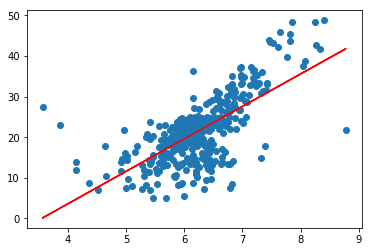

In [150]:
s = SimpleLinearRegression3()
s.fit(x_train, y_train)
plt.scatter(x_train,y_train)
plt.plot(x_train, s.predict(x_train), color = "r")
plt.show()

In [151]:
y_predict = s.predict(x_test)

## MSE

In [153]:
mse_test = (y_predict - y_test).dot(y_predict - y_test) / len(y_test)
mse_test

29.281681912061583

## RMSE

In [117]:
rmse_test = np.sqrt(mse_test)
rmse_test

5.9552905698804945

## MAE

In [113]:
mae_test = np.sum(np.absolute(y_predict - y_test) / len(y_test))
mae_test

4.3414238594477155

In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [115]:
mean_absolute_error(y_test, y_predict)

4.3414238594477155

In [116]:
mean_squared_error(y_test, y_predict)

35.46548577170754

In [118]:
R2 = 1 - np.sum((y_predict - y_test)**2) / np.sum((y_test.mean() - y_test)**2)

In [155]:
1 - mse_test / np.var(y_test)

0.4827737834636978

In [120]:
from MachineLearning.metrics import r_squared

In [152]:
r_squared(y_test, y_predict)

0.4827737834636977

In [122]:
s0 = SimpleLinearRegression3()

In [142]:
x0 = np.random.normal(0,10000,1000)
y0 = np.random.normal(0,10000,1000)
s0.fit(x0, y0)

In [143]:
r_squared(np.random.normal(0,10000,100),s0.predict(np.random.normal(0,10000,100)))

-0.004304231390249491

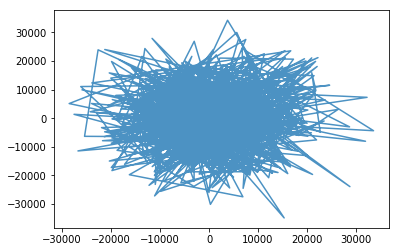

In [148]:
plt.plot(x0, y0, alpha = 0.8)

In [200]:
%%timeit
from MachineLearning.LinearRegression import LinearRegression
from sklearn import datasets
from MachineLearning.util import train_test_split
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[ y < 50.0 ]
y = y[ y < 50.0 ]
X_train, X_test, y_train, y_test = train_test_split(X, y, ratio = 0.1, seed = 66)
l = LinearRegression()
l.fit_normal(X_train, y_train)
print(l.score(X_test, y_test))

0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904

0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904029354
0.8185143904

In [201]:
%%timeit
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from MachineLearning.util import train_test_split
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[ y < 50.0 ]
y = y[ y < 50.0 ]
X_train, X_test, y_train, y_test = train_test_split(X, y, ratio = 0.1, seed = 66)
l = LinearRegression()
l.fit(X_train, y_train)
print(l.score(X_test, y_test))

0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904

0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904029595
0.8185143904

## KNN Regressor

In [214]:
%%timeit
from sklearn.neighbors import KNeighborsRegressor
from MachineLearning.util import train_test_split
l = KNeighborsRegressor(n_neighbors= 7 , weights= "distance", p = 1)
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[ y < 50.0 ]
y = y[ y < 50.0 ]
X_train, X_test, y_train, y_test = train_test_split(X, y, ratio = 0.1, seed = 66)
l.fit(X_train, y_train)
print(l.score(X_test, y_test))

0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156

0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156114502
0.6782173156

In [211]:
from sklearn.model_selection import GridSearchCV
from MachineLearning.util import train_test_split
param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1,11)]
    },{
        "weights": ["distance"],
        "n_neighbors":[i for i in range(1,11)],
        "p": [i for i in range(1,6)]
    }
]
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[ y < 50.0 ]
y = y[ y < 50.0 ]
X_train, X_test, y_train, y_test = train_test_split(X, y, ratio = 0.1, seed = 66)
knn = KNeighborsRegressor()
g = GridSearchCV(knn, param_grid = param_grid, n_jobs=-1)
g.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [212]:
g.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [215]:
g.best_score_

0.6361579383001453

In [ ]:
g.best_estimator_.score